# Assignment Knowledge & Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Ruben|secret |
|Maurizia|secret |
|Rowan| secret|
|Sava|secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import Graph

In [3]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')

<Graph identifier=Nd6e837ed59aa4a4290166cf84bc1931c (<class 'rdflib.graph.Graph'>)>

In [4]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/Nonstop_(Vocal_Point_album)'),
   rdflib.term.URIRef('http://dbpedia.org/property/extra'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/State_of_Independence'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

In [5]:
qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 9368,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/Nonstop_(Vocal_Point_album)'),
   rdflib.term.URIRef('http://dbpedia.org/property/extra'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/State_of_Independence'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))])

# Tutorial

## RDF: algemeen
**Resource Description Framework** of **RDF** is een standaard van het World Wide Web Consortium (W3C), oorspronkelijk ontworpen als een metadata-model, maar gaandeweg gebruikt als een formaat om gegevens in het algemeen voor te stellen en uit te wisselen ([Wikipedia](https://nl.wikipedia.org/wiki/Resource_Description_Framework)). 

Een **RDF-statement** heeft altijd de volgende vorm: subject - predicaat - object.
Een RDF-statement geeft een relatie aan tussen twee bronnen. Het subject en het object zijn de twee bronnen, het predicaat duidt op de relatie hiertussen. Omdat RDF stattements uit drie elementen bestaan worden ze **triples** genoemd.

## RDF: nodes
De nodes in de graaf bestaan uit de subjecten en objecten. Er zijn drie soorten nodes:
* Een **BNode** (Blank Node) is een node waarvan de exacte URI niet bekend is
* Een **URIRef** (URI references) is een node waarvan de exacte URI bekend is
* **Literals** duiden op attribute values (naam, datum, nummer, e.d.)

Hieronder een paar voorbeelden:

In [6]:
from rdflib import URIRef, BNode, Literal, Namespace
from rdflib.namespace import FOAF, DCTERMS, XSD, RDF, SDO

# BNode
EX = Namespace('http://example.org/')
Hans = EX['Hans']
Marie = EX['Marie']

# URIRef
Netherlands = URIRef('https://www.wikidata.org/wiki/Q55')
Basketball_player = URIRef('https://www.wikidata.org/wiki/Q3665646')


#Literals
birth_date = Literal("1990-07-04", datatype=XSD['date'])

birth_date


rdflib.term.Literal('1990-07-04', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date'))

## RDF: graaf & relaties
Met rdflib kan makkelijk een graaf aangemaakt worden, waarin we de nodes kunnen plaatsen en relaties kunnen leggen. 

De primaire interface die RDFLib beschikbaar stelt om met RDF te werken, is een grafiek.

RDFLib-grafieken zijn geen gesorteerde containers; ze hebben reguliere set-bewerkingen (bijv.add () om een triple toe te voegen) plus methoden die naar triples zoeken en deze in willekeurige volgorde retourneren.

Lees meer in de [documentatie]('https://rdflib.readthedocs.io/en/stable/gettingstarted.html). 

In [7]:
from rdflib import Graph
tutorial_graph = Graph()

# Bind prefix to namespace
tutorial_graph.bind('ex', EX)
tutorial_graph.bind('foaf', FOAF)
tutorial_graph.bind('schema', SDO)

tutorial_graph.add((Hans, RDF.type, FOAF.Person))
tutorial_graph.add((Hans, FOAF.knows, Marie))
tutorial_graph.add((Marie, SDO['birthDate'], birth_date))

print(tutorial_graph.serialize(format='ttl').decode('u8'))


@prefix ex: <http://example.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix schema: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:Hans a foaf:Person ;
    foaf:knows ex:Marie .

ex:Marie schema:birthDate "1990-07-04"^^xsd:date .




## Deelopdracht 1: NetworkX naar RDF Database


**De networkx2RDF functie**

Deze functie zet een NetworkX DiGraph om tot een RDF Database. Enkele vereisten:
* De functie moet elke DiGraph als input kunnen hebben
* De nodes moeten attributen kunnen bevatten

Dit doen we in de volgende stappen:
* Ophalen van alle nodes en edges in het netwerk en deze omzetten tot RDF-termen.
* Relaties tussen nodes als triples toevoegen in RDF graaf.
 * Dit doen we door *(node A, HasConnectionWith, node B)* toe te voegen. We gebruiken *HasConnectionWith* als predicaat omdat deze functie universeel moet zijn voor alle soorten DiGraphs die hieringezet worden. Een edge kan dus op verschillende soorten relaties duiden, die niet van te voren bekend zijn.
* Attributen van nodes toevoegen in RDF graaf. 
 * Dit doen we door *(node A, HasAttribute, attribute)* toe te voegen, volgens dezelfde redenering als hierboven.

 De functie staat hieronder uitgeschreven:

In [8]:
from rdflib import Graph, URIRef, BNode, Literal, Namespace
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD

def networkx2RDF(G):
    nodes = G.nodes()      
    EX = Namespace('http://example.org/')
    
    # Get all relations from networkx graph -> convert to RDFterms
    relations = G.edges()
    rdf_relations = [(EX[relation[0]], EX[relation[1]]) for relation in relations]

    # Create graph + add all relations
    g = Graph()
    for relation in rdf_relations:
        g.add((relation[0], EX.HasConnetionWith, relation[1]))
    
    # Bind prefix
    g.bind('ex', EX)
    
    # Get all node attributes
    node_attributes = list(set([a for node in nodes for a in nodes[node]]))
    
    # Add attributes to RDF
    for a in node_attributes:
        with_attribute = nx.get_node_attributes(G, a)
        for node in with_attribute:
            if with_attribute[node]:
                g.add((EX[node], EX.HasAttribute, EX[a]))
    return g


## Deelopdracht 2: SPARQL queries voor gedefinieerde relaties

##### 2.1: Familierelaties
Hieronder is een familiestamboom in een NetworkX graaf gemaakt:

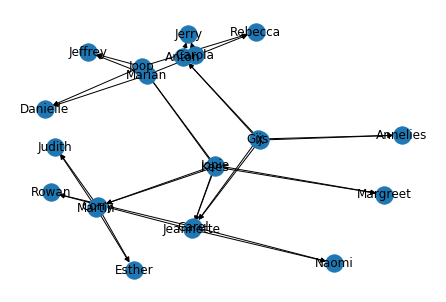

In [9]:
import networkx as nx
F = nx.DiGraph()
M,V= {'Kees', 'Joop', 'Martin', 'Carel', 'Jeffrey', 'Rowan', 'Gijs', 'Anton', 'Jerry'},{'Jopie', 'Marian', 'Margreet', 'Corry', 'Jeannette', 'Rebecca', 'Danielle', 'Esther', 
                                                                                        'Judith', 'Naomi', 'Carola', 'Annelies', 'X'}
F.add_nodes_from(M)
F.add_nodes_from(V)
for n in M:
    F.nodes[n]['M']=True
    F.nodes[n]['V']=False
for n in V:
    F.nodes[n]['V']=True
    F.nodes[n]['M']=False     


rel = [('Jopie', 'Joop'), ('Jopie', 'Margreet'), ('Jopie', 'Corry'), ('Jopie', 'Jeannette'), ('Kees', 'Joop'), ('Kees', 'Margreet'), ('Kees', 'Corry'), ('Kees', 'Jeannette'),
       ('Gijs', 'Carel'), ('Gijs', 'Anton'), ('Gijs', 'Annelies'), ('X', 'Carel'), ('X', 'Anton'), ('X', 'Annelies'), 
       ('Joop', 'Rebecca'), ('Joop', 'Danielle'), ('Joop', 'Jeffrey'), ('Marian', 'Rebecca'), ('Marian', 'Danielle'), ('Marian', 'Jeffrey'), 
       ('Corry', 'Esther'), ('Corry', 'Judith'), ('Martin', 'Esther'), ('Martin', 'Judith'),
       ('Jeannette', 'Rowan'), ('Jeannette', 'Naomi'), ('Carel', 'Rowan'), ( 'Carel', 'Naomi'),
       ('Carola', 'Jerry'), ( 'Anton', 'Jerry')
       
      ]


F.add_edges_from(rel)

nx.draw(F, with_labels=True)

Hieronder is de opdracht uit week 2 te zien, waarbij de verschillende familierelaties uit de graaf gehaald worden:

In [10]:
# Assignment week2
def M(x, network):
  return network.nodes[x]['M']

def V(x, network):
  return network.nodes[x]['V']

def R(x,y, network):
  return network.has_edge(x,y) 

Vaders = {(x,y) for x in F for y in F if R(x,y, F) and M(x,F)}
Moeders = {(x,y) for x in F for y in F if R(x,y, F) and V(x,F)}
Zoons = {(x,y) for x in F for y in F if R(y,x,F) and M(x,F)}
Dochters = {(x,y) for x in F for y in F if R(y,x,F) and V(x,F)}
Opas = {(x,y) for x in F for y in F for z in F if R(x,z,F) and R(z,y,F) and M(x,F)}
Omas = {(x,y) for x in F for y in F for z in F if R(x,z,F) and R(z,y,F) and V(x,F)}
Neven = {(x,y) for x in F for y in F for z in F for u in F for v in F if R(v,z,F) and R(v,u,F) and R(z,x,F) and R(u,y,F) and M(x,F)}
Nichten = {(x,y) for x in F for y in F for z in F for u in F for v in F if R(v,z,F) and R(v,u,F) and R(z,x,F) and R(u,y,F) and V(x,F)}
Ooms = {(x,y) for x in F for y in F for z in F for u in F if R(u,x,F) and R(u,z,F) and R(z,y,F) and M(x,F)}
Tantes = {(x,y) for x in F for y in F for z in F for u in F if R(u,x,F) and R(u,z,F) and R(z,y,F) and V(x,F)}
print("Vader", Vaders, '\n')


Vader {('Martin', 'Esther'), ('Anton', 'Jerry'), ('Gijs', 'Annelies'), ('Gijs', 'Carel'), ('Martin', 'Judith'), ('Gijs', 'Anton'), ('Kees', 'Joop'), ('Kees', 'Margreet'), ('Joop', 'Danielle'), ('Carel', 'Rowan'), ('Kees', 'Corry'), ('Joop', 'Rebecca'), ('Kees', 'Jeannette'), ('Joop', 'Jeffrey'), ('Carel', 'Naomi')} 



**Lees meer informatie over SPARQL Queries in de [documentatie](https://rdflib.readthedocs.io/en/stable/intro_to_sparql.html).**

* De relaties (in vormen van tuples in de comprehensies hierboven) die we met de SPARQL Queries eruit willen halen, zetten wij bij *SELECT DISTINCT*.
* De ouderrelaties die in de comprehensie staan, zetten we onder *WHERE* in de vorm ?x ex:HasConnectionWith ?y.
* Het geslacht definiëren we aan de hand van attributen, in SPARQL onder *WHERE* in de vorm ?x ex:HasAttribute ex:M (waarbij x een man is).

Voorbeeld:

In [11]:
Vaders = {(x,y) for x in F for y in F if R(x,y, F) and M(x,F)}

# Variabelen om te selecteren: x & y -> SELECT DISTINCT ?x ?y
# Waarvoor geldt (relaties): WHERE {?x ex:HasConnectionWith ?y.
# Geslacht: ?x ex:HasAttribute ex:M.}

# SPARQL Query wordt dus als volgt:
Family_RDF = networkx2RDF(F)
EX = Namespace('http://example.org/')
Family_RDF.bind('ex', EX)

Vaders_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?x ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:M.
    }""")

Met bovenstaande voobeeld kunnen alle comprehensies van hierboven omgezet worden tot SPARQL Queries:

In [12]:
Family_RDF = networkx2RDF(F)
EX = Namespace('http://example.org/')
Family_RDF.bind('ex', EX)
    
Vaders_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?x ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:M.
    }""")

Moeders_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?x ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:M.
    }""")

Zoons_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?y ex:HasConnetionWith ?x.
        ?x ex:HasAttribute ex:M.
    }""")

Dochters_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?y ex:HasConnetionWith ?x.
        ?x ex:HasAttribute ex:V.
    }""")

Opas_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?x ex:HasConnetionWith ?z.
        ?z ex:HasConnetionWith ?y.      
        ?x ex:HasAttribute ex:M.
    }""")


Omas_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?x ex:HasConnetionWith ?z.
        ?z ex:HasConnetionWith ?y.      
        ?x ex:HasAttribute ex:V.
    }""")

Neven_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?v ex:HasConnetionWith ?z.
        ?v ex:HasConnetionWith ?u.
        ?z ex:HasConnetionWith ?x.
        ?u ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:M.
    }""")

Nichten_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?v ex:HasConnetionWith ?z.
        ?v ex:HasConnetionWith ?u.
        ?z ex:HasConnetionWith ?x.
        ?u ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:V.
    }""")

Ooms_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?u ex:HasConnetionWith ?x.
        ?u ex:HasConnetionWith ?z.
        ?z ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:M.
    }""")

Tantes_RDF = Family_RDF.query(
    """SELECT DISTINCT ?x ?y
    WHERE {
        ?u ex:HasConnetionWith ?x.
        ?u ex:HasConnetionWith ?z.
        ?z ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:V.
    }""")




**Output vergelijken**

We kunnen nu kijken of de outputs overeenkomen. Hieronder wordt het voorbeeld van vaders geprint. Daarnaast printen we van elke relatie de lengte van zowel de output van de comprehensie als die van de SPARQL Queries:

In [13]:
print(Vaders)
for row in Vaders_RDF:
    print(str(row))
    # print("%s is father of %s" % row)

print("Vergelijken van outputs (lengtes zijn gelijk)")
print(len(Vaders), len(Vaders_RDF))
print(len(Moeders), len(Moeders_RDF))
print(len(Zoons), len(Zoons_RDF))
print(len(Dochters), len(Dochters_RDF))
print(len(Opas), len(Opas_RDF))
print(len(Omas), len(Omas_RDF))
print(len(Neven), len(Neven_RDF))
print(len(Nichten), len(Nichten_RDF))
print(len(Ooms), len(Ooms_RDF))
print(len(Tantes), len(Tantes_RDF))

{('Martin', 'Esther'), ('Anton', 'Jerry'), ('Gijs', 'Annelies'), ('Gijs', 'Carel'), ('Martin', 'Judith'), ('Gijs', 'Anton'), ('Kees', 'Joop'), ('Kees', 'Margreet'), ('Joop', 'Danielle'), ('Carel', 'Rowan'), ('Kees', 'Corry'), ('Joop', 'Rebecca'), ('Kees', 'Jeannette'), ('Joop', 'Jeffrey'), ('Carel', 'Naomi')}
(rdflib.term.URIRef('http://example.org/Kees'), rdflib.term.URIRef('http://example.org/Joop'))
(rdflib.term.URIRef('http://example.org/Kees'), rdflib.term.URIRef('http://example.org/Corry'))
(rdflib.term.URIRef('http://example.org/Kees'), rdflib.term.URIRef('http://example.org/Jeannette'))
(rdflib.term.URIRef('http://example.org/Kees'), rdflib.term.URIRef('http://example.org/Margreet'))
(rdflib.term.URIRef('http://example.org/Joop'), rdflib.term.URIRef('http://example.org/Danielle'))
(rdflib.term.URIRef('http://example.org/Joop'), rdflib.term.URIRef('http://example.org/Jeffrey'))
(rdflib.term.URIRef('http://example.org/Joop'), rdflib.term.URIRef('http://example.org/Rebecca'))
(rdf

##### 2.2 LHBTIQ+
Hieronder is een NetworkX graaf met LHBTIQ+ relaties te zien:

[('Gijs', {'M': True, 'V': False}), ('Machiel', {'M': True, 'V': False}), ('Peter', {'M': True, 'V': False}), ('Ignes', {'M': False, 'V': True}), ('Yvonne', {'M': False, 'V': True}), ('Lisanne', {'M': False, 'V': True}), ('Allison', {'M': False, 'V': True}), ('Simone', {'M': False, 'V': True}), ('Dominique', {'M': False, 'V': True}), ('Tom', {'M': False, 'V': False}), ('Erik', {'M': False, 'V': False}), ('Mike', {'M': False, 'V': False}), ('Sam', {'M': False, 'V': True})]


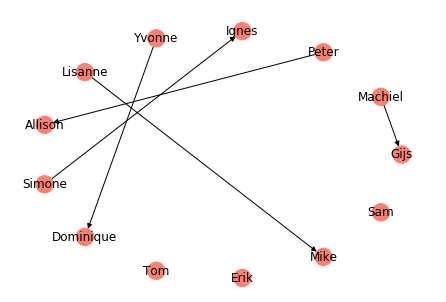

In [14]:
Q = nx.DiGraph()

M,V,I = {'Peter', 'Machiel','Gijs'}, {'Simone','Ignes','Allison','Lisanne','Yvonne','Dominique'}, {'Mike','Tom','Erik'} # de mannen, vrouwen en intersekse personen in dit netwerk

# De attributen M,V,I goed zetten
Q.add_nodes_from(M)
Q.add_nodes_from(V)
Q.add_nodes_from(I)

for n in M:
    Q.nodes[n]['M']=True
    Q.nodes[n]['V']=False
for n in V:
    Q.nodes[n]['M']=False
    Q.nodes[n]['V']=True
    
# Een intersekse persoon valt niet onder man en ook niet onder vrouw
for n in I:
    Q.nodes[n]['M']=False
    Q.nodes[n]['V']=False


# Trans (M2F)
Q.add_node('Sam')

# Gender-identiteit bij geboorte is Man
Q.nodes['Sam']["M"]=True
Q.nodes['Sam']["V"]=False

# Gender-identiteit verandert naar Vrouw
Q.nodes['Sam']["V"]=True
Q.nodes['Sam']["M"]=False


color_list = ['salmon' for x in range(len(Q.nodes))]
    
    
# Edges zijn relaties tussen personen 
# Nodes hebben een gender (boolean) 
Q.add_edge('Simone', 'Ignes', label="L") # L
Q.add_edge('Machiel', 'Gijs', label="H") # H
Q.add_edge('Peter', 'Allison', label="B") # B1
Q.add_edge('Yvonne', 'Dominique', label="B") # B2
# T = Sam (M2F)
# Q = Tom
# I = Erik
# A = Lot
Q.add_edge('Lisanne', 'Mike', label="P") # P
print(Q.nodes(data=True))

nx.draw_circular(Q, with_labels=True, node_color=color_list)

In [15]:
def M(x, network):
  return network.nodes[x]['M']
def V(x, network):
  return network.nodes[x]['V']
def R(x,y, network):
  return network.has_edge(x,y) 
  
Lesbie = {x for x in Q for y in Q if R(x,y,Q) and V(x,Q) and V(y,Q)}
Homo = {x for x in Q for y in Q if R(x,y,Q) and M(x,Q) and M(y,Q)}
Hetero = {x for x in Q for y in Q if (R(x,y,Q) and M(x,Q) and V(y,Q)) or (R(x,y,Q) and V(x,Q) and M(y,Q))}

In [16]:
LHBTIQ_RDF = networkx2RDF(Q)
EX = Namespace('http://example.org/')
LHBTIQ_RDF.bind('ex', EX)
    
Lesbie_RDF = LHBTIQ_RDF.query(
    """SELECT DISTINCT ?x 
    WHERE {
        ?x ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:V.
        ?y ex:HasAttribute ex:V.

    }""")

Homo_RDF = LHBTIQ_RDF.query(
    """SELECT DISTINCT ?x 
    WHERE {
        ?x ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:M.
        ?y ex:HasAttribute ex:M.

    }""")
        

Hetero_RDF = LHBTIQ_RDF.query(
    """SELECT *{
    
    {SELECT DISTINCT ?x 
    WHERE {
        ?x ex:HasConnetionWith ?y.
        ?x ex:HasAttribute ex:M.
        ?y ex:HasAttribute ex:V.
    }
    } UNION {
     SELECT DISTINCT ?x 
      WHERE {
        ?x ex:HasConnectionWith ?y.
        ?x ex:HasAttribute ex:V.
        ?y ex:HasAttribute ex:M.
    }}}""")


**Vergelijken output**

In [17]:
print("Lesbie volgens eerdere opdracht: ", Lesbie, "\nLesbie volgens RDF:")
for row in Lesbie_RDF:
  print(row)
print("\n")

print("Homo volgens eerdere opdracht: ", Homo, "\nHomo volgens RDF:")
for row in Homo_RDF:
  print(row)
print("\n")

print("Hetero volgens eerdere opdracht: ", Hetero, "\nHetero volgens RDF:")
for row in Hetero_RDF:
  print(row)
print("\n")

Lesbie volgens eerdere opdracht:  {'Simone', 'Yvonne'} 
Lesbie volgens RDF:
(rdflib.term.URIRef('http://example.org/Yvonne'),)
(rdflib.term.URIRef('http://example.org/Simone'),)


Homo volgens eerdere opdracht:  {'Machiel'} 
Homo volgens RDF:
(rdflib.term.URIRef('http://example.org/Machiel'),)


Hetero volgens eerdere opdracht:  {'Peter'} 
Hetero volgens RDF:
(rdflib.term.URIRef('http://example.org/Peter'),)




In [18]:
from rdflib import Graph
g = Graph()   # create an empty graph to load data into
# download countries.rdf van http://telegraphis.net/data/countries/
result = g.parse("countries.rdf")

## Deelopdracht 3: Networkx Maten
We hebben hier een simpele RDF database gevonden over de landen in de wereld. 
We hebben hierbij enkele maten van onderzocht, wat basis maten (zoals de hoeveelheid nodes en edges van de grafiek en de density), wat centrality maten en clustering maten.

**Belangrijk: om deze cel hieronder te kunnen runnen moet het bestand hierboven gedownload worden!**

In [ ]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph, rdflib_to_networkx_graph
import networkx as nx

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

G = rdflib_to_networkx_digraph(result)
    
print("BASIS MATEN:")
print()

print("NETWERK GROOTTE")
print("Het network heeft {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()
    
print("DENSITY")
print("De network density is {}".format(nx.density(G)))
print()

print("Eccentricity, diameter (maximum eccentricity) en radius (minimum eccentricity) zijn niet toepasbaar op dit netwerk omdat het netwerk niet strongly connected is.")
print()

print("CENTRALITY MATEN:")
print()

eigen_vector = nx.eigenvector_centrality(G)
l = []
for k,v in eigen_vector.items():
    l.append(v)
    
print("EIGENVECTOR CENTRALITY")
print("De mediaan netwerk eigenvector centrality is {}".format(mean(l)))
print()

betweenness_centrality = nx.betweenness_centrality(G)
l = []
for k,v in betweenness_centrality.items():
    l.append(v)
print("BETWEENNESS CENTRALITY")
print("De mediaan betweenness centrality is {}".format(mean(l)))
print()

closeness_centrality = nx.closeness_centrality(G)
l = []
for k,v in closeness_centrality.items():
    l.append(v)
print("CLOSENESS CENTRALITY")
print("De mediaan closeness centrality is {}".format(mean(l)))
print()

degree_centrality = nx.degree_centrality(G)
l = []
for k,v in degree_centrality.items():
    l.append(v)
print("DEGREE CENTRALITY")
print("De mediaan degree centrality is {}".format(mean(l)))
print()

print("CLUSTERING:")
print()

clustering = nx.clustering(G)
print("CLUSTERS")
print("Het netwerk heeft {} clusters".format(len(clustering)))
print()

print("GEMIDDELDE CLUSTERING")
print("Het netwerk heeft een average clustering coefficient of {}".format(nx.average_clustering(G)))

BASIS MATEN:

NETWERK GROOTTE
Het network heeft 4910 nodes and 9330 edges

DENSITY
De network density is 0.0003870856928066368

Eccentricity, diameter (maximum eccentricity) en radius (minimum eccentricity) zijn niet toepasbaar op dit netwerk omdat het netwerk niet strongly connected is.

CENTRALITY MATEN:

EIGENVECTOR CENTRALITY
De mediaan netwerk eigenvector centrality is 0.0008355306743598112

